In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Content/WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.shape

(1143, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
 df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


<Axes: xlabel='quality', ylabel='count'>

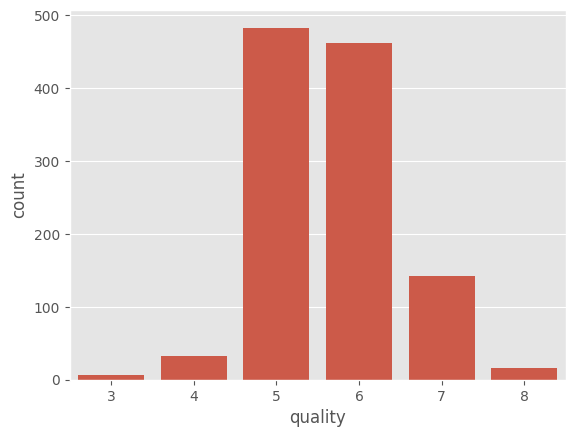

In [ ]:
style.use('ggplot')
sns.countplot(x='quality', data=df)

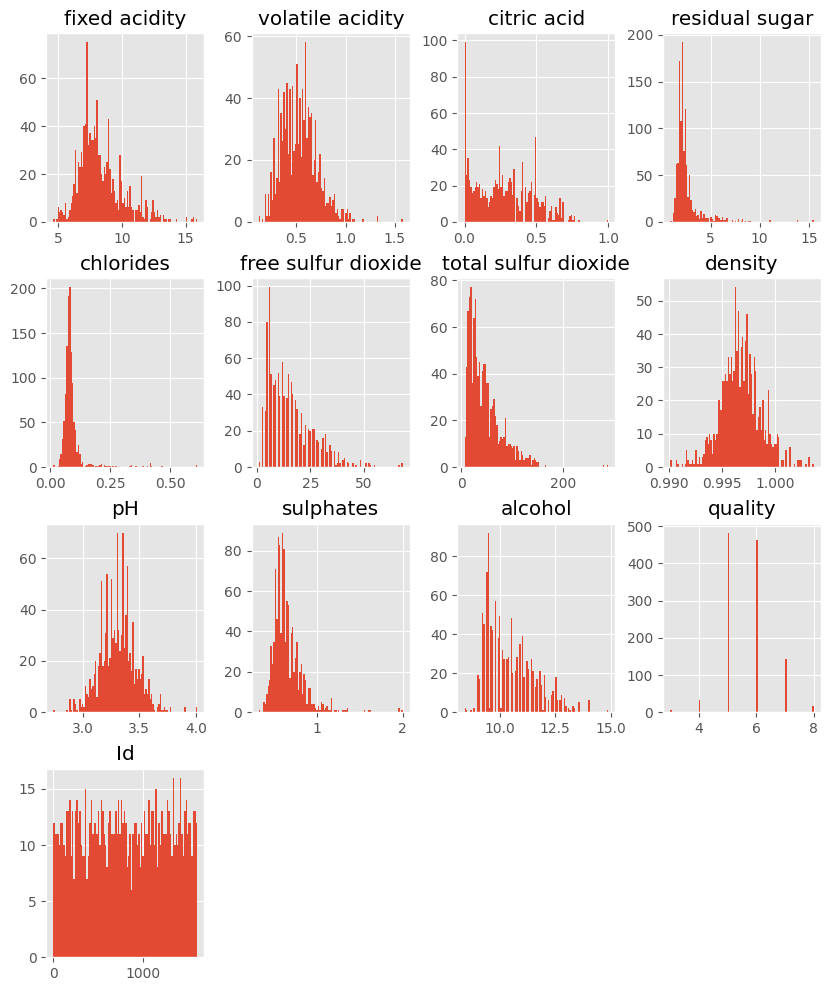

In [ ]:
df.hist(bins=100, figsize=(10,12))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

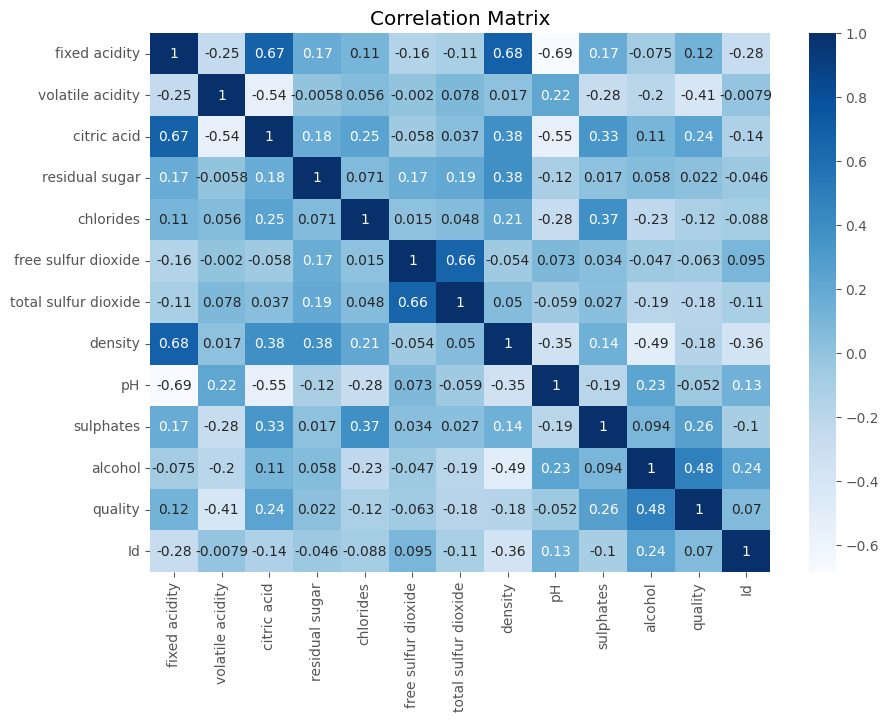

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show

In [ ]:
df.corr()['quality'].sort_values()

,quality
volatile acidity,-0.407394
total sulfur dioxide,-0.183339
density,-0.175208
chlorides,-0.124085
free sulfur dioxide,-0.063260
pH,-0.052453
residual sugar,0.022002
Id,0.069708
fixed acidity,0.121970
citric acid,0.240821


<Axes: xlabel='quality', ylabel='alcohol'>

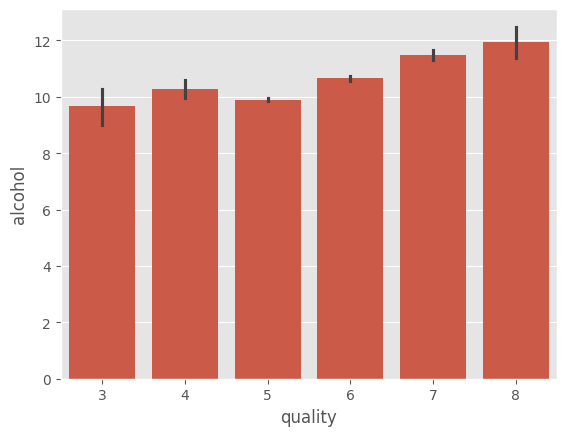

In [ ]:
sns.barplot(x='quality', y='alcohol', data=df) # Specify x and y columns using named arguments and pass the DataFrame to the data parameter

In [ ]:
# Data Processing
df['quality'] = df['quality'].apply(lambda x: 1 if x>6 else 0)

In [ ]:
df['quality'].value_counts()

,count
quality,
0,984
1,159


In [ ]:
df.drop('quality', axis=1)
df['quality']

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1138,0
1139,0
1140,0
1141,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.2, random_state=42)

In [ ]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (914, 12)
y_train  (914,)
X_test  (229, 12)
y_test  (229,)


In [ ]:
# Model Traning
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 89.08%


In [ ]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       201
           1       0.58      0.39      0.47        28

    accuracy                           0.89       229
   macro avg       0.75      0.68      0.70       229
weighted avg       0.88      0.89      0.88       229



In [ ]:
# Desicion Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 86.46%


In [ ]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       201
           1       0.46      0.68      0.55        28

    accuracy                           0.86       229
   macro avg       0.71      0.78      0.74       229
weighted avg       0.89      0.86      0.88       229



In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Test accuracy: {:.2f}%".format(rf_accuracy*100))

Test accuracy: 92.14%


In [ ]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       201
           1       0.69      0.64      0.67        28

    accuracy                           0.92       229
   macro avg       0.82      0.80      0.81       229
weighted avg       0.92      0.92      0.92       229



In [ ]:
# Stochastic Gradient Descent Classifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
sgd_predictions = sgd_classifier.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print("Test accuracy: {:.2f}%".format(sgd_accuracy*100))

Test accuracy: 27.95%


In [ ]:
print(classification_report(y_test, sgd_predictions))

              precision    recall  f1-score   support

           0       0.97      0.18      0.31       201
           1       0.14      0.96      0.25        28

    accuracy                           0.28       229
   macro avg       0.56      0.57      0.28       229
weighted avg       0.87      0.28      0.30       229



In [ ]:
# Support Vector Classifier
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("Test accuracy: {:.2f}%".format(svc_accuracy*100))

Test accuracy: 87.77%


In [ ]:
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       201
           1       0.00      0.00      0.00        28

    accuracy                           0.88       229
   macro avg       0.44      0.50      0.47       229
weighted avg       0.77      0.88      0.82       229

